In [1]:
# !pip install bs4

In [2]:
#!pip install wordcloud

In [3]:
# !pip install --user pyLDAvis

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_colwidth', None) #prevent truncated view of dataframe

In [6]:
sdf = pd.read_csv("software_job_postings_results.csv")
ddf = pd.read_csv("data_job_postings_results.csv")
cdf = pd.read_csv("computer_job_postings_results.csv")

In [7]:
df = pd.concat([sdf,ddf,cdf],ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2635 non-null   int64  
 1   keyword                            2635 non-null   object 
 2   link                               2635 non-null   object 
 3   job_id                             2635 non-null   int64  
 4   job_title                          2635 non-null   object 
 5   job_expired                        2635 non-null   bool   
 6   job_confidential                   2635 non-null   bool   
 7   job_salary_min                     998 non-null    float64
 8   job_salary_max                     998 non-null    float64
 9   job_salary_currency                2552 non-null   object 
 10  company                            2609 non-null   object 
 11  job_post_date                      2635 non-null   objec

In [9]:
df.head()

,Unnamed: 0,keyword,link,job_id,job_title,job_expired,job_confidential,job_salary_min,job_salary_max,job_salary_currency,...,job_requirement_yearsOfExperience,job_requirement_qualification,job_requirement_skill,job_employment_type,job_languages,job_benefits,job_apply_url,job_location_zipcode,job_location,job_country
0,0,software,/en/job/software-developer-9354937,9354937,Software Developer,False,False,2800.0,3500.0,SGD,...,2 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree",NaN,Full-Time,NaN,"['Dental', 'Medical', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9354937&advertisement_id=9353308&s=20&AdvertisementSource=1,701404,Paya Lebar,sg
1,1,software,/en/job/software-engineer-9407446,9407446,Software Engineer,False,False,4000.0,6500.0,SGD,...,2 years,Not Specified,NaN,Full-Time,NaN,"['Dental', 'Education support', 'Miscellaneous allowance', 'Medical', 'Sports (e.g. Gym)', 'Parking', 'Vision', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9407446&advertisement_id=9405817&s=20&AdvertisementSource=1,701507,Jurong West,sg
2,2,software,/en/job/software-qa-engineer-9409290,9409290,Software QA Engineer,False,False,4200.0,5880.0,SGD,...,2 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree, Doctorate (PhD)",NaN,Full-Time,NaN,"['Education support', 'Miscellaneous allowance', 'Medical', 'Parking', 'Regular hours, Mondays - Fridays', 'Casual (e.g. T-shirts)', 'Employee Share Option Plan (ESOP), Flexible Benefits']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9409290&advertisement_id=9407661&s=20&AdvertisementSource=1,701506,Jurong East,sg
3,3,software,/en/job/senior-software-developer-9408408,9408408,Senior Software Developer,False,False,NaN,NaN,SGD,...,5 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree",NaN,Full-Time,NaN,"['Dental', 'Medical', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9408408&advertisement_id=9406779&s=20&AdvertisementSource=1,701499,East - Others,sg
4,4,software,/en/job/software-programmer-work-from-home-9310317,9310317,Software Programmer (Work From Home),False,False,6000.0,9000.0,SGD,...,5 years,"Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree",NaN,Full-Time,NaN,"['Education support', 'Medical', 'Equity share in software company. Eligible for benefits from VC investment']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9310317&advertisement_id=9308688&s=20&AdvertisementSource=1,701703,Bukit Timah,sg


In [10]:
df = df.drop_duplicates(['job_id'])

In [11]:
df = df.drop_duplicates(['job_title','job_description','job_benefits'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2634
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2543 non-null   int64  
 1   keyword                            2543 non-null   object 
 2   link                               2543 non-null   object 
 3   job_id                             2543 non-null   int64  
 4   job_title                          2543 non-null   object 
 5   job_expired                        2543 non-null   bool   
 6   job_confidential                   2543 non-null   bool   
 7   job_salary_min                     967 non-null    float64
 8   job_salary_max                     967 non-null    float64
 9   job_salary_currency                2464 non-null   object 
 10  company                            2518 non-null   object 
 11  job_post_date                      2543 non-null   objec

In [13]:
import re

def clean_job_title(job_title):
    job_title = re.sub("[\(\[].*?[\)\]]", "", job_title) #remove everything within the bracket
    job_title = re.sub(r'[^\w]', ' ', job_title) #remove that's not alphanumeric or underscore
    job_title = re.sub(r'\w*\d\w*', '', job_title) #remove words with number
    job_title = job_title.strip() #remove trailing and ending whitespace
    job_title = re.sub("\s\s+", " ", job_title) #remove multiple whitespace
    job_title = job_title.title() #proper casing
    return job_title

In [14]:
df["clean_job_title"] = df["job_title"].apply(clean_job_title)

In [15]:
jdf = pd.DataFrame(df["clean_job_title"].value_counts())

In [16]:
#remove runtime error on Glyph fonts
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

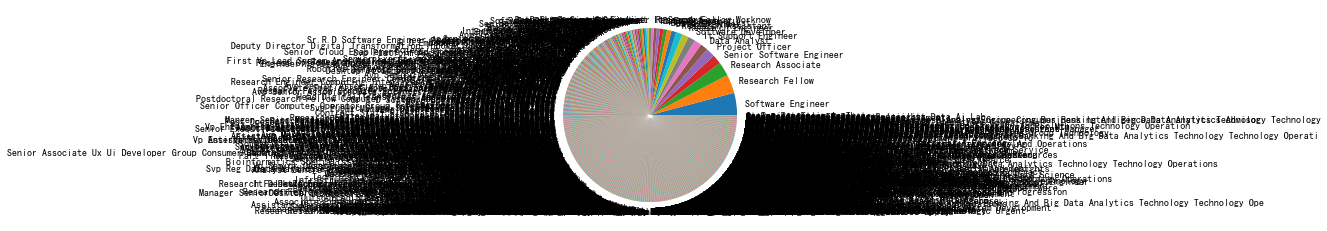

In [17]:
df.clean_job_title.value_counts().plot(kind="pie")

In [18]:
jdf[jdf["clean_job_title"] > 1]

,clean_job_title
Software Engineer,105
Research Fellow,88
Research Associate,66
Senior Software Engineer,45
Project Officer,42
...,...
Software Architect,2
Research Fellow Computer Engineering Computer Science,2
C Net Software Developer,2
Senior Software Test Analyst,2


# To-do: Match job title to common ones, to reduce the number of nodes in the network map using cosine similarity

In [19]:
from nltk.tokenize import word_tokenize

def tokeniseWord(word):
    return word_tokenize(word.lower())

In [20]:
df["job_title_token"] = df["clean_job_title"].apply(tokeniseWord)

In [21]:
embeddings_index = {};
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

In [22]:
def convertWord2Embedding(tokens):
    try:
        vec = np.copy(embeddings_index[tokens[0]])
        for i in range(1,len(tokens)):
            vec += np.copy(embeddings_index[tokens[i]])
        return list(vec)
    except Exception as e:
        return "error"

In [23]:
df["word_embedding"] = df["job_title_token"].apply(convertWord2Embedding)

In [24]:
df = df.drop(df.loc[df['word_embedding']=="error"].index)

In [25]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=1, init="k-means++", random_state = 42)
kmeans.fit(list(df["word_embedding"]))

KMeans(n_clusters=1, random_state=42)

In [26]:
from sklearn import cluster
from sklearn import metrics

wcss = []
for i in range(1, 11): 
    kmeans = cluster.KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(list(df["word_embedding"]))
    wcss.append(kmeans.inertia_)


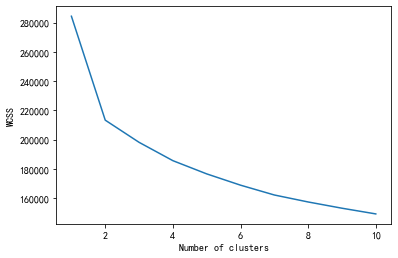

In [27]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [28]:
kmeans = cluster.KMeans(n_clusters=4, random_state = 42)
kmeans.fit(list(df["word_embedding"]))

labels = kmeans.labels_
df['elabels'] = labels

In [29]:
for label in df.labels.unique():
    print("Labels:",label)
    print(df[df['elabels']==label].clean_job_title.value_counts()[:10])
    print("#"*20)

AttributeError: 'DataFrame' object has no attribute 'labels'

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(df["job_title_token"], min_count=1)

In [ ]:
def convertWord2Vec(tokens):
    try:
        vec = np.copy(model.wv.__getitem__(tokens[0]))
        for i in range(1,len(tokens)):
            vec += np.copy(model.wv.__getitem__(tokens[i]))
        return vec
    except Exception as e:
        return "error"

In [ ]:
df["word_vector"] = df["job_title_token"].apply(convertWord2Vec)

In [ ]:
df = df.drop(df.loc[df['word_vector']=="error"].index)

In [ ]:
from sklearn import cluster
from sklearn import metrics

wcss = []
for i in range(1, 11): 
    kmeans = cluster.KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(list(df["word_vector"]))
    wcss.append(kmeans.inertia_)

# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
 
# print ("Cluster id labels for inputted data")
# print (labels)
# print ("Centroids data")
# print (centroids)

# df['labels'] = labels

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters=3, random_state = 42)
kmeans.fit(list(df["word_vector"]))

labels = kmeans.labels_
df['vlabels'] = labels

In [ ]:
for label in df.labels.unique():
    print("Labels:",label)
    print(df[df['vlabels']==label].clean_job_title.value_counts()[:10])
    print("#"*20)

# Job Description

In [ ]:
# from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
def clean_job_description(job_description):
#     soup = BeautifulSoup(job_description) #certain text merged together due to HTML structure
#     job_description = soup.get_text() #remove all html tags
    job_description = job_description.lower()
    job_description = re.sub('<[^<]+?>', ' ', job_description) #remove all html tags
    job_description = re.sub(r'[^\w]', ' ', job_description) #remove that's not alphanumeric or underscore
    job_description = job_description.strip() #remove trailing and ending whitespace
    job_description = re.sub("\s\s+", " ", job_description) #remove multiple whitespace
    text_tokens = word_tokenize(job_description)
    job_description = [word for word in text_tokens if not word in stopwords.words('english')] #stop word removal
#     job_description = " ".join(tokens_without_sw) 
    return job_description

In [ ]:
df["clean_job_description"] = df["job_description"].apply(clean_job_description)

In [ ]:
word_cloud_text = " ".join(" ".join(description) for description in df.clean_job_description).lower()

In [ ]:
word_freq = WordCloud().process_text(word_cloud_text)
dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["job", "requirement", "role", "using", "required", "amp", "etc"]) #Add specific stop words if required

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(word_cloud_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Modelling to check if words can be clustered

In [ ]:
# import gensim

In [ ]:
# import gensim.corpora as corpora# Create Dictionary
# id2word = corpora.Dictionary(df["clean_job_description"])# Create Corpus
# texts = df["clean_job_description"]# Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]# View
# print(corpus[:1][0][:30])

In [ ]:
# from pprint import pprint# number of topics
# num_topics = 5# Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models
# import pickle 
# import os

# # Visualize the topics
# pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # if 1 == 1:
# #     LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
# #     with open(LDAvis_data_filepath, 'wb') as f:
# #         pickle.dump(LDAvis_prepared, f)
# # # load the pre-prepared pyLDAvis data from disk
# # with open(LDAvis_data_filepath, 'rb') as f:
# #     LDAvis_prepared = pickle.load(f)

# # pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')


# LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

# LDAvis_prepared

# To-do: Map descriptions to job title, display in network map